📩 SMS Spam Detection using Machine Learning

Spam messages continue to flood our inboxes, posing not only a nuisance but also potential security risks such as phishing attacks and scams. In this project, we explore a data-driven approach to detect and classify SMS messages as spam or ham (non-spam) using machine learning techniques.

We will be working with the SMS Spam Collection Dataset, which contains thousands of real-world text messages labeled as either spam or ham. The goal is to build a reliable classification model that can automatically identify spam messages based on the text content.

We shall start by loading the dataset and exploring it

In [18]:
import pandas as pd

# Load the dataset and display the first 5 rows

df = pd.read_csv(r'C:\Users\user\Documents\Data-Science-Projects\SMS-Spam-Detection\data\spam.csv', encoding='latin-1')


print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


This displays the first 10 rows of the data

In [19]:
print(df.head(10))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

This shows the necessary info of the the dataset

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


shows missing values in each column

In [45]:
data= df.isnull().sum()
print(data)

label            0
message          0
label_num        0
length           0
clean_message    0
dtype: int64


This shows the size of the dataset.
It shows that the dataset has 5572 rows and 5 columns.

In [21]:
df.shape

(5572, 5)

This shows the column s and their respective names.

In [22]:
df.columns.values

array(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype=object)

In [23]:
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


Here, we are renaming the columns

In [24]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']


Here, I am mapping ham messages to 0 and spam to 1(for future use)

In [25]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


Here, it shows the distribution of ham and spam messages in the dataset

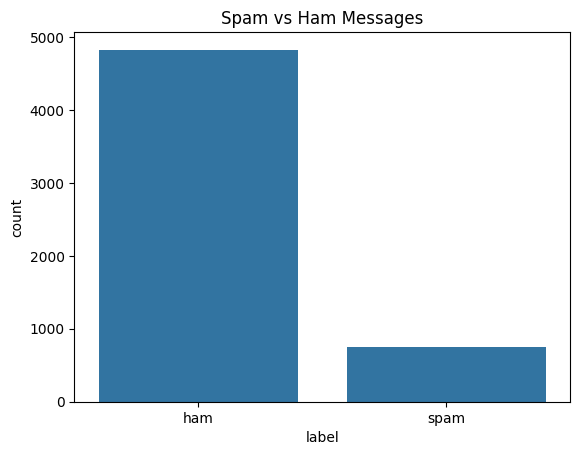

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Messages')
plt.show()


Displaying the message length distribution of spam and ham over the dataset

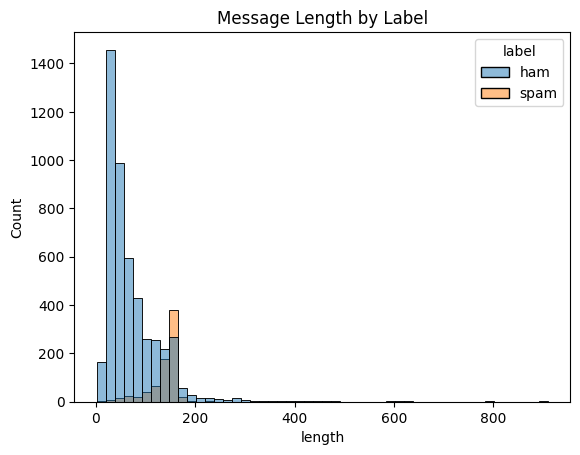

In [27]:
df['length'] = df['message'].apply(len)

sns.histplot(data=df, x='length', hue='label', bins=50)
plt.title('Message Length by Label')
plt.show()


Just checking for the ham and spam count in the dataset

In [28]:
print(df['label'].unique())
print(df['label'].value_counts())


['ham' 'spam']
label
ham     4825
spam     747
Name: count, dtype: int64


Here we clean and reorganise the data and prepare it for training

In [29]:
import re
import string

def clean_text(text):
    text = text.lower()#puts all words in lowercase
    text = re.sub(r'\d+', '', text)#regular expression to remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))#removes symbols
    return text

df['clean_message'] = df['message'].apply(clean_text)


Here, we used TF-IDF to assign numerical values to the words and also assign importance of words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)#chooses a maximum of 3000 words that are mosyt important
X = vectorizer.fit_transform(df['clean_message'])#performs the operation on the cleaned data

y = df['label_num']


Now, we can go ahead and train different classifiers to predict whther a message is spam or ham

Let's start by splitting the data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

So, Let's start with Logistic Regression



In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [39]:
log_model=model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


print("Accuracy:", accuracy_score(y_test, log_model))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_model))
print("Classification Report:\n", classification_report(y_test, log_model))

Accuracy: 0.9632286995515695
Confusion Matrix:
 [[965   0]
 [ 41 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.73      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



WE NOW TEST THE MODEL TO SEE HOW WELL IT WORKS.

we transfrom the message using TF-IDF like  done above, also we use the clean_text function we had created to remove numbers and other characters like punctuation marks etc

In [42]:
def predict_message(msg):
    clean_msg = clean_text(msg)  
    msg_vector = vectorizer.transform([clean_msg])  
    prediction = model.predict(msg_vector)[0]  
    return "Spam! DO NOT FOLLOW!" if prediction == 1 else "Ham, GO AHEAD AND RESPOND:)"


print(predict_message("You have won $10,000. Click to claim now!"))
print(predict_message("Hi, are we still on for lunch today?"))


Spam! DO NOT FOLLOW!
Ham, GO AHEAD AND RESPOND:)


The above response shows that the first message is spam and the second is okay.

In [47]:
import joblib
joblib.dump(model,'LogisticRegModel.pkl')


['LogisticRegModel.pkl']

We shall now use the svm algortihm

In [50]:
from sklearn.svm import SVC


In [51]:
svm_model=SVC()
svm_model.fit(X_train, y_train)

SVC()

In [53]:
svm_pred=svm_model.predict(X_test)

In [55]:
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

Accuracy: 0.97847533632287
Confusion Matrix:
 [[965   0]
 [ 24 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



From the above we see that the SVC has a higher accuracy compared to the Logistic Regression model hence being more ideal to use

Now we shall test and see whether it works

In [68]:
def predict_mess(msg):
    clean_msg = clean_text(msg)  
    msg_vector = vectorizer.transform([clean_msg])  
    prediction = svm_model.predict(msg_vector)[0]  
    return "Spam! DO NOT FOLLOW!" if prediction == 1 else "Ham, GO AHEAD AND RESPOND:)"

In [72]:
print(predict_mess("Congratulations! You've won a free vacation. Click to claim."))
print(predict_mess("Hey, are we still meeting for lunch today?"))
print(predict_mess("Can you send me the assignment notes?"))
print(predict_mess("Register here to claim your prize award!"))


Spam! DO NOT FOLLOW!
Ham, GO AHEAD AND RESPOND:)
Ham, GO AHEAD AND RESPOND:)
Spam! DO NOT FOLLOW!


In [60]:
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

We shall now use another model

We shall use the naive bayes model

In [61]:
from sklearn.naive_bayes import MultinomialNB



In [ ]:
naive_model=MultinomialNB()

In [63]:
naive_model.fit(X_train, y_train)

MultinomialNB()

In [64]:
naive_pred=naive_model.predict(X_test)

In [65]:
print("Accuracy:", accuracy_score(y_test, naive_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, naive_pred))
print("Classification Report:\n", classification_report(y_test, naive_pred))

Accuracy: 0.9739910313901345
Confusion Matrix:
 [[965   0]
 [ 29 121]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



from the above, we can see that it is more accurate than logistic reg but not more than svm 

lets test its functionality by creating a function 

In [74]:
def predict_msg(msg):
    clean_msg = clean_text(msg)  
    msg_vector = vectorizer.transform([clean_msg])  
    prediction = naive_model.predict(msg_vector)[0]  
    return "Spam! DO NOT FOLLOW!" if prediction == 1 else "Ham, GO AHEAD AND RESPOND:)"